# Victor Armando Jaramillo Moreno

In [18]:
import Levenshtein
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [19]:
words = [
  "university",
  "universidad",
  "universe",
  "panamericana",
  "artificial",
  "artefact",
  "intelligence",
  "intelligent",
  "smart",
  "small"
]

In [20]:
# Initialize an empty distance matrix
distance_matrix = [[0.0] * len(words) for _ in range(len(words))]

# Calculate the Levenshtein distance between each pair of words
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        distance = Levenshtein.distance(words[i], words[j])
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

# Print the distance matrix
for row in distance_matrix:
    print(row)

[0.0, 3, 3, 9, 9, 8, 10, 9, 8, 10]
[3, 0.0, 4, 8, 9, 10, 10, 9, 10, 10]
[3, 4, 0.0, 9, 9, 8, 8, 9, 7, 8]
[9, 8, 9, 0.0, 9, 9, 10, 9, 10, 10]
[9, 9, 9, 9, 0.0, 5, 10, 9, 9, 9]
[8, 10, 8, 9, 5, 0.0, 9, 8, 6, 7]
[10, 10, 8, 10, 10, 9, 0.0, 2, 12, 10]
[9, 9, 9, 9, 9, 8, 2, 0.0, 10, 9]
[8, 10, 7, 10, 9, 6, 12, 10, 0.0, 2]
[10, 10, 8, 10, 9, 7, 10, 9, 2, 0.0]


In [21]:
mds = MDS(n_components=2)
points_2d = mds.fit_transform(distance_matrix)
for word, point in zip(words, points_2d):
    print(f"Word: {word}, 2D Point: {point}")

Word: university, 2D Point: [ 2.98403636 -9.47863025]
Word: universidad, 2D Point: [ -0.33279509 -10.48578386]
Word: universe, 2D Point: [ 4.07314483 -6.77389784]
Word: panamericana, 2D Point: [-7.36172983 -5.06993612]
Word: artificial, 2D Point: [-0.78561324  8.31606206]
Word: artefact, 2D Point: [2.69860016 6.40998795]
Word: intelligence, 2D Point: [-12.31578649   3.85594868]
Word: intelligent, 2D Point: [-9.75894053  4.79019584]
Word: smart, 2D Point: [11.01575186  2.8868465 ]
Word: small, 2D Point: [9.78333197 5.54920704]


c:\Users\victor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


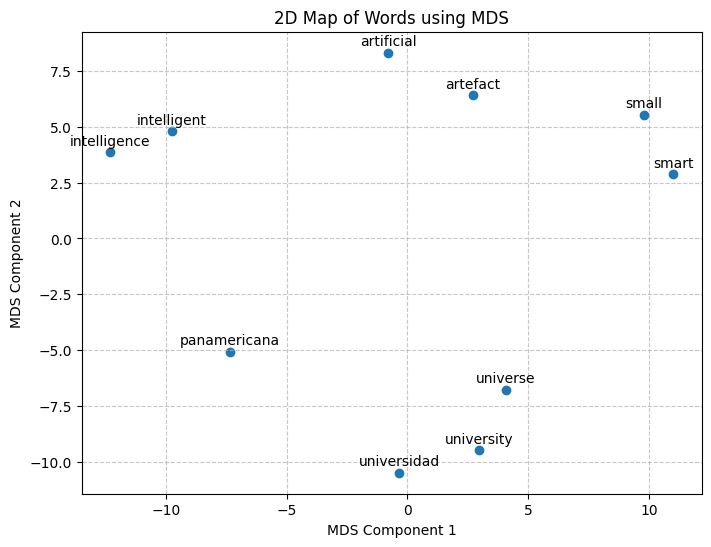

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(points_2d[:, 0], points_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (points_2d[i, 0], points_2d[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('2D Map of Words using MDS')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()